In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from adjustText import adjust_text
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2003','2019']].dropna()
pop_df['2019']=pop_df['2019'].astype(int)
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values
possible_countries=[x.lower() for x in possible_countries]



excluded_iso3_codes = [
    "IRL",  # Ireland
    "SSD",  # South Sudan
    "SDN",  # Sudan
    "COG",  # Republic of the Congo
    "COD",  # Democratic Republic of the Congo
    "GIN",  # Guinea
    "GNB",  # Guinea-Bissau
    "GNQ",  # Equatorial Guinea
    "PNG",  # Papua New Guinea
    "XKX",  # Kosovo (unofficial)
    "MNE",  # Montenegro
    "SRB",  # Serbia
    "TLS"   # Timor-Leste
]
excluded_iso3_codes=[c.lower() for c in excluded_iso3_codes]

possible_iso=list(set(possible_countries)-set(excluded_iso3_codes))

In [3]:

df=pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df[(df['affiliation_country'].isin(possible_iso))&df['country'].isin(possible_iso)]

df=df.rename(columns={'year':'Year', 'aggregated_value':'count', 'country':'Mention_country', 'affiliation_country':'Aff_country'})
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
country_codes=pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
country_codes['iso3']=[c.lower() for c in country_codes['iso3']]
physical_sciences=[ 'MATH', 'ENGI', 'PHYS', 'COMP', "MUL"]
df=df[~df['subjarea'].isin(physical_sciences)]
map={country_codes.iloc[c]['iso3']: country_codes.iloc[c]['name'] for c in range(len(country_codes))}
map['irn']='Iran'
map['usa']='USA'
map['gbr']='UK'
map['are']='UAE'
filtered_df=df[(df['Mention_country'].isin(abbr))&(df['Mention_country']!=df['Aff_country'])]

before_df=filtered_df[filtered_df['Year'].isin(np.arange(2002, 2011, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_before'})
after_df=filtered_df[filtered_df['Year'].isin(np.arange(2011, 2020, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_after'})
compare_df=before_df.merge(after_df, how='outer', on=['Mention_country','Aff_country']).fillna(0)
compare_df['count_after']/=9
compare_df['count_before']/=9
compare_df=compare_df.groupby(['Aff_country'])[['count_before', 'count_after']].sum().reset_index()
compare_df['difference']=compare_df['count_after']-compare_df['count_before']
compare_df_attention=compare_df.sort_values('difference', ascending=False)


In [4]:

Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country for country in Country_list.values()]
c_list=list(Country_list.values())
years=np.arange(2002, 2020, 1)
df=pd.read_csv(r"C:\Users\Yasaman\Downloads\scopus_2024_V1_scholarlymigration_countryflows_enriched_new.csv")
df=df[df['year'].isin(years)].reset_index(drop=True)

filtered_df=df[(df['iso3codefrom'].isin(abbr))&(df['iso3codefrom']!=df['iso3codeto'])]

before_df=filtered_df[filtered_df['year'].isin(np.arange(2002, 2011, 1))].groupby(by=['iso3codefrom','iso3codeto'])['n_migrations'].sum().reset_index()[['n_migrations','iso3codefrom','iso3codeto']].rename(columns={'n_migrations':'count_before'})
after_df=filtered_df[filtered_df['year'].isin(np.arange(2011, 2020, 1))].groupby(by=['iso3codefrom','iso3codeto'])['n_migrations'].sum().reset_index()[['n_migrations','iso3codefrom','iso3codeto']].rename(columns={'n_migrations':'count_after'})
compare_df=before_df.merge(after_df, how='outer', on=['iso3codefrom','iso3codeto']).fillna(0)
compare_df['count_after']/=9
compare_df['count_before']/=9

compare_df=compare_df.groupby(['iso3codeto'])[['count_before', 'count_after']].sum().reset_index()
compare_df['difference']=compare_df['count_after']-compare_df['count_before']
compare_df_migration=compare_df.sort_values('difference', ascending=False)


In [5]:
compare_df_migration.reset_index(drop=True, inplace=True)
compare_df_migration['iso3codeto']=compare_df_migration['iso3codeto'].str.lower()
compare_df_attention.reset_index(drop=True, inplace=True)
final_df=compare_df_attention.merge(compare_df_migration, left_on='Aff_country', right_on='iso3codeto', how='outer'
                                    , suffixes=['_attention', '_migration']).drop(columns=['iso3codeto'])

In [6]:
plot_a_df=final_df[['Aff_country', 'difference_attention','count_before_migration']].fillna(0)

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


are
can
deu
esp
fra
gbr
ita
jpn
mys
sau
usa


C:\Users\Yasaman\AppData\Local\Temp\ipykernel_34472\1183889048.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for line in inset_plot_a_df[((plot_a_df['count_before_migration']<20)&(inset_plot_a_df['count_before_migration']>5))|((inset_plot_a_df['difference_attention']>30)&(plot_a_df['difference_attention']<40))].index:


Pearson Correlation Coefficient: 0.7813867140085075
P-value: 3.319587057263556e-35
Spearman Correlation Coefficient: 0.7452993581499503
P-value: 1.677316648683672e-30


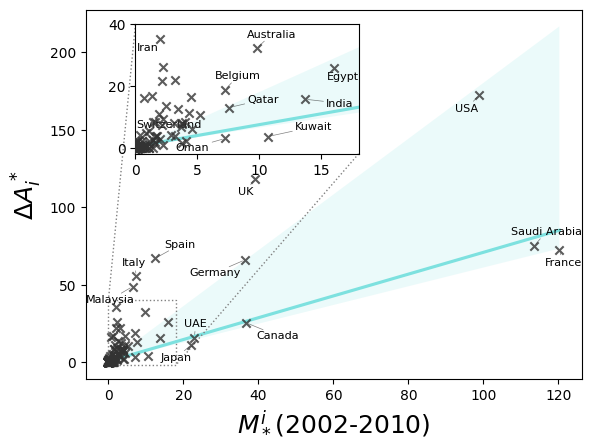

In [7]:
fig, ax1=plt.subplots(nrows=1, ncols=1)
ins = ax1.inset_axes([0.1,0.61,0.45,0.35])


sns.regplot(plot_a_df, x='count_before_migration', y='difference_attention' ,marker="x", color=".2", line_kws=dict(color="#7DE1DF"),ax=ax1,  scatter_kws={"zorder":10}, robust=True)
ax1.set_xlabel(r'$M^i_* \text{(2002-2010)}$', fontsize=18)
ax1.set_ylabel(r'$\Delta A^*_i$', fontsize=18)


inset_plot_a_df=plot_a_df[(plot_a_df['count_before_migration']<30)&(plot_a_df['difference_attention']<40)]
sns.regplot(plot_a_df, x='count_before_migration', y='difference_attention' ,marker="x", color=".2", line_kws=dict(color="#7DE1DF"),ax=ins,  scatter_kws={"zorder":10}, robust=True)
ins.set_ylabel(r'', fontsize=10)
ins.set_xlabel(r'', fontsize=10)


ins.set_xlim(0, 18)
ins.set_ylim(-15/8, 40)


points=[]
# Annotate each point
for line in plot_a_df[(plot_a_df['count_before_migration']>20)|(plot_a_df['difference_attention']>40)].index:

    x = plot_a_df.count_before_migration[line]
    y = plot_a_df.difference_attention[line]
    label =map[plot_a_df.Aff_country[line]]
    print(plot_a_df.Aff_country[line])
    points+=[ax1.text(x, y, label,
                    fontsize=8, ha='center', va='center')]

adjust_text(points, arrowprops=dict(arrowstyle="-", color='k', lw=0.5, alpha=.5), expand=(1.5, 2.5), ax=ax1)        

points2=[]
# Annotate each point
for line in inset_plot_a_df[((plot_a_df['count_before_migration']<20)&(inset_plot_a_df['count_before_migration']>5))|((inset_plot_a_df['difference_attention']>30)&(plot_a_df['difference_attention']<40))].index:

    x = inset_plot_a_df.count_before_migration[line]
    y = inset_plot_a_df.difference_attention[line]
    label =map[inset_plot_a_df.Aff_country[line]]
    points2+=[ins.text(x, y, label,
                    fontsize=8, ha='center', va='center')]
    
adjust_text(points2, arrowprops=dict(arrowstyle="-", color='k', lw=0.5, alpha=.5), expand=(2.5, 2), ax=ins)        


correlation_coefficient, p_value = pearsonr(plot_a_df['count_before_migration'], plot_a_df['difference_attention'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

correlation_coefficient, p_value = stats.spearmanr(plot_a_df['count_before_migration'], plot_a_df['difference_attention'])
print("Spearman Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

mark_inset(ax1, ins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle=':')

fig.savefig('pre_AS_migration_vs_Attention_change.pdf', bbox_inches='tight')